In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df_raw = pd.read_csv("/content/drive/MyDrive/ConceptAndTechnologiesOfAI/Classification_Dataset/global_climate_energy_2020_2024.csv")

In [137]:
df_raw.shape, df.shape

((36540, 10), (36540, 10))

In [138]:
df_raw.head()

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60


In [139]:
df.shape

(36540, 10)

In [140]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       36540 non-null  object 
 1   country                    36540 non-null  object 
 2   avg_temperature            36540 non-null  float64
 3   humidity                   36540 non-null  float64
 4   co2_emission               36540 non-null  float64
 5   energy_consumption         36540 non-null  float64
 6   renewable_share            36540 non-null  float64
 7   urban_population           36540 non-null  float64
 8   industrial_activity_index  36540 non-null  float64
 9   energy_price               36540 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.8+ MB


In [141]:
df_raw.describe()

,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
count,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000
mean,13.580868,59.971469,445.820452,7295.904857,15.944080,74.982156,70.173094,115.279848
std,10.077249,17.303103,234.360906,3693.928504,5.334804,8.645400,17.334816,49.178361
min,-9.600000,30.000000,50.150000,1001.890000,5.000000,60.000000,40.000000,30.000000
25%,5.630000,45.010000,248.675000,4184.177500,12.020000,67.470000,55.300000,72.420000
50%,13.790000,59.990000,422.655000,6921.620000,15.715000,75.030000,70.055000,115.240000
75%,20.840000,74.970000,628.422500,10175.110000,19.840000,82.502500,85.260000,158.270000
max,38.710000,90.000000,999.850000,15998.050000,30.870000,90.000000,100.000000,200.000000


In [142]:
df = df_raw.copy()

In [143]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['date', 'country', 'avg_temperature', 'humidity', 'co2_emission',
       'energy_consumption', 'renewable_share', 'urban_population',
       'industrial_activity_index', 'energy_price'],
      dtype='object')

In [144]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [145]:
df['date'].isnull().sum()

np.int64(0)

In [146]:
df.isnull().sum()

,0
date,0
country,0
avg_temperature,0
humidity,0
co2_emission,0
energy_consumption,0
renewable_share,0
urban_population,0
industrial_activity_index,0
energy_price,0


In [147]:
# Numerical features: fill with median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [55]:
# Categorical features: fill with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [56]:
df_sorted_co2 = df.sort_values(by='co2_emission', ascending=False)
df_sorted_co2[['country', 'co2_emission']].head(10)

,country,co2_emission
22927,Brazil,999.85
33883,Mexico,999.68
7371,Spain,999.48
8493,Spain,999.46
35148,Indonesia,999.30
26197,China,998.94
23291,Brazil,998.81
34974,Indonesia,998.72
10680,Sweden,998.70
22729,Brazil,998.64


In [69]:
high_renewable = df[df['renewable_share'] > 30]
high_renewable.shape

(41, 10)

In [71]:
high_renewable.head(10)

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
1634,2024-06-22,Germany,22.49,64.77,389.38,7848.18,30.65,66.19,91.50,143.22
1672,2024-07-30,Germany,17.65,43.66,235.01,8003.40,30.19,68.10,61.93,197.51
1811,2024-12-16,Germany,22.49,62.97,74.12,7614.19,30.05,88.98,61.50,43.95
3349,2024-03-02,France,22.09,65.53,657.83,5978.92,30.45,69.42,44.68,86.09
3436,2024-05-28,France,17.73,61.29,475.78,4264.27,30.44,79.14,97.54,133.39
3493,2024-07-24,France,5.75,58.61,369.52,6658.85,30.87,89.85,76.21,155.68
7283,2024-12-07,Italy,20.53,85.36,384.54,3140.43,30.08,72.07,81.10,80.57
8879,2024-04-20,Spain,27.48,41.24,112.14,2098.17,30.41,75.98,68.88,154.86
10742,2024-05-26,Sweden,15.18,46.40,223.81,6022.84,30.16,73.10,53.77,110.38
10865,2024-09-26,Sweden,-5.09,32.51,275.13,5228.02,30.34,65.47,46.37,117.63


In [61]:
energy_emission_heavy = df[
    (df['energy_consumption'] > df['energy_consumption'].quantile(0.75)) &
    (df['co2_emission'] > df['co2_emission'].quantile(0.75))
]

energy_emission_heavy.shape

(3063, 10)

In [72]:
energy_emission_heavy.head()

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
5,2020-01-06,Germany,27.81,32.92,644.48,11955.99,7.08,78.71,78.70,128.62
11,2020-01-12,Germany,28.32,48.71,704.67,11142.89,7.38,88.69,65.67,98.55
33,2020-02-03,Germany,29.58,78.53,861.99,11751.94,14.87,80.81,78.30,70.29
46,2020-02-16,Germany,30.44,50.62,658.60,14358.32,8.65,66.24,84.85,78.34
64,2020-03-05,Germany,30.80,55.14,747.17,10260.59,13.51,86.78,61.22,104.70


In [148]:
df['renewable_norm'] = (df['renewable_share'] - df['renewable_share'].min()) / \
                       (df['renewable_share'].max() - df['renewable_share'].min())

df['co2_norm'] = (df['co2_emission'] - df['co2_emission'].min()) / \
                 (df['co2_emission'].max() - df['co2_emission'].min())

df['energy_norm'] = (df['energy_consumption'] - df['energy_consumption'].min()) / \
                    (df['energy_consumption'].max() - df['energy_consumption'].min())


In [149]:
df['sustainability_score'] = (
    df['renewable_norm']
    - df['co2_norm']
    - df['energy_norm']
)


In [150]:
df['energy_sustainability_level'] = pd.qcut(
    df['sustainability_score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

df['energy_sustainability_level'].value_counts()


,count
energy_sustainability_level,
Low,12180
Medium,12180
High,12180


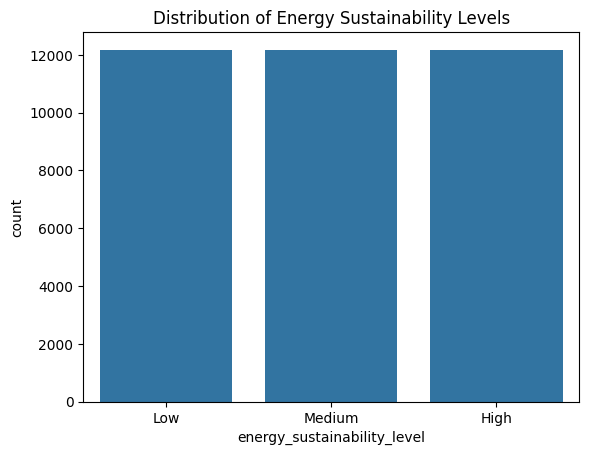

In [76]:
sns.countplot(x='energy_sustainability_level', data=df)
plt.title("Distribution of Energy Sustainability Levels")
plt.show()

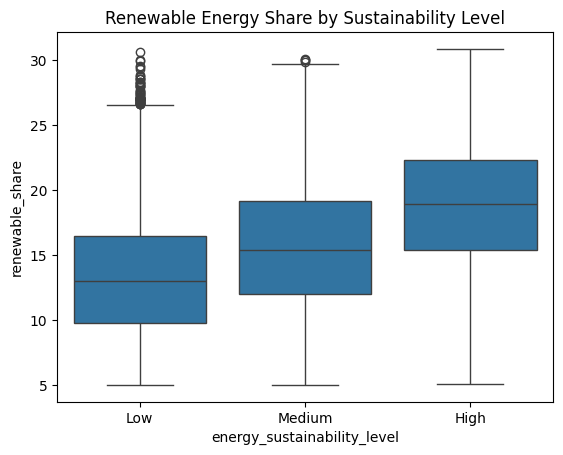

In [77]:
sns.boxplot(
    x='energy_sustainability_level',
    y='renewable_share',
    data=df
)
plt.title("Renewable Energy Share by Sustainability Level")
plt.show()


In [34]:
country_avg = df.groupby('country')['co2_emission'].mean().sort_values(ascending=False)

country_avg.head(10)


,co2_emission
country,
Australia,454.389059
Mexico,449.765840
Japan,449.510443
Germany,449.447334
South Africa,449.359163
China,448.988894
France,448.679956
Norway,447.815567
United States,447.627121


In [35]:
country_avg.tail(10)


,co2_emission
country,
Netherlands,446.447745
Poland,446.097088
India,445.744844
Canada,445.317783
Sweden,443.880241
United Kingdom,442.856957
Italy,442.606119
Brazil,440.884510
Indonesia,437.787449


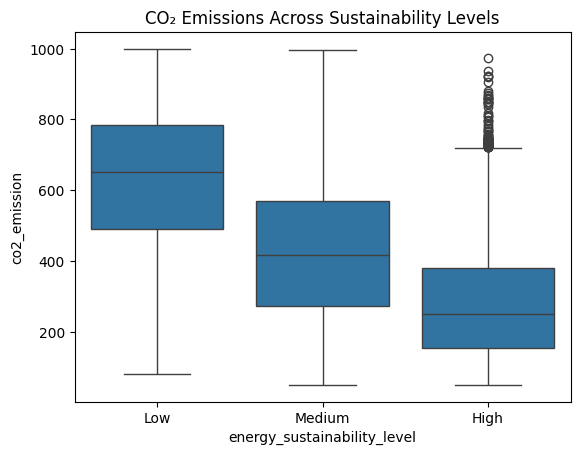

In [12]:
sns.boxplot(
    x='energy_sustainability_level',
    y='co2_emission',
    data=df
)
plt.title("CO₂ Emissions Across Sustainability Levels")
plt.show()


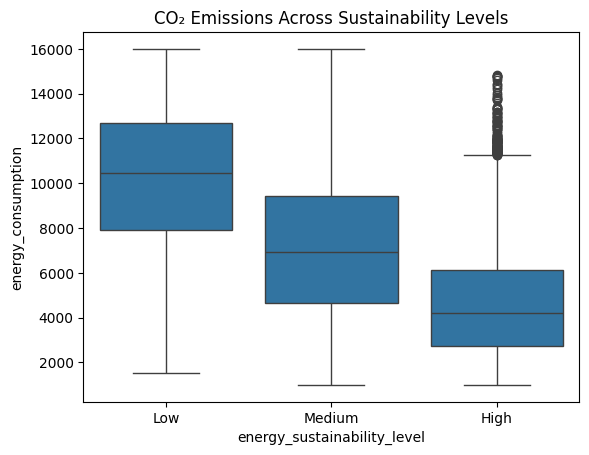

In [133]:
sns.boxplot(
    x='energy_sustainability_level',
    y='energy_consumption',
    data=df
)
plt.title("CO₂ Emissions Across Sustainability Levels")
plt.show()


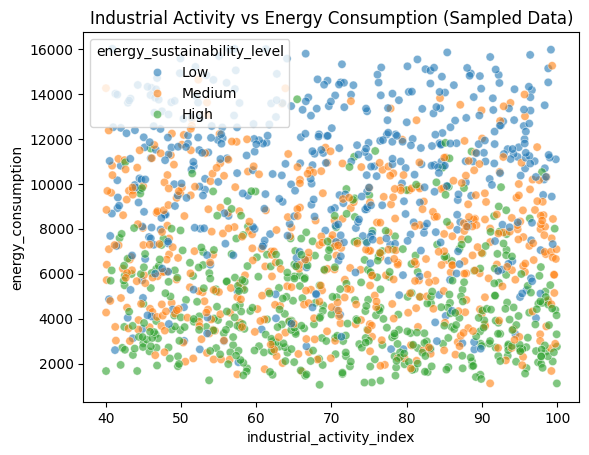

In [131]:
df_sample = df.sample(n=1500, random_state=42)

sns.scatterplot(
    x='industrial_activity_index',
    y='energy_consumption',
    hue='energy_sustainability_level',
    data=df_sample,
    alpha=0.6
)
plt.title("Industrial Activity vs Energy Consumption (Sampled Data)")
plt.show()


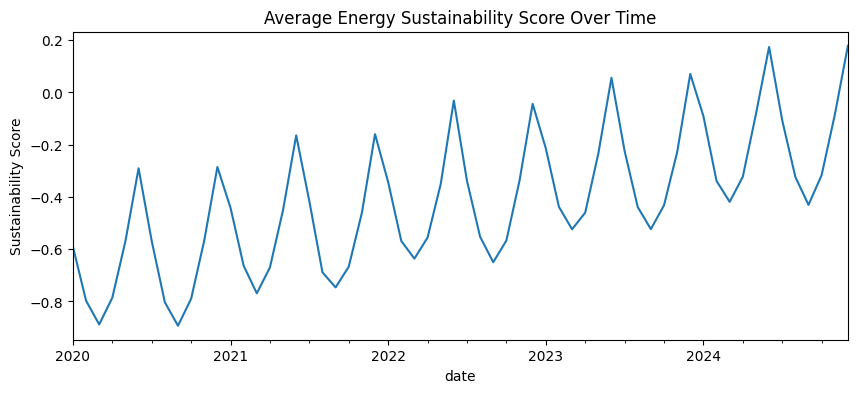

In [79]:
monthly_score = df.groupby(pd.Grouper(key='date', freq='M'))['sustainability_score'].mean()

monthly_score.plot(figsize=(10,4))
plt.title("Average Energy Sustainability Score Over Time")
plt.ylabel("Sustainability Score")
plt.show()


In [98]:
# Select numeric features only
numeric_df = df.select_dtypes(include=[np.number])

# Variance and standard deviation
variance_df = pd.DataFrame({
    'Variance': numeric_df.var(),
    'Standard_Deviation': numeric_df.std()
}).sort_values(by='Variance', ascending=False)

variance_df

,Variance,Standard_Deviation
energy_consumption,1.364511e+07,3693.928504
co2_emission,5.492503e+04,234.360906
energy_price,2.418511e+03,49.178361
industrial_activity_index,3.004959e+02,17.334816
humidity,2.993974e+02,17.303103
avg_temperature,1.015509e+02,10.077249
urban_population,7.474294e+01,8.645400
renewable_share,2.846013e+01,5.334804
sustainability_score,1.853765e-01,0.430554
co2_norm,6.089722e-02,0.246774


In [99]:
cv_df = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Standard_Deviation': numeric_df.std()
})

cv_df['Coefficient_of_Variation'] = cv_df['Standard_Deviation'] / cv_df['Mean']
cv_df.sort_values(by='Coefficient_of_Variation', ascending=False)


,Mean,Standard_Deviation,Coefficient_of_Variation
avg_temperature,13.580868,10.077249,0.742018
co2_norm,0.416627,0.246774,0.592313
energy_norm,0.419708,0.246325,0.586895
co2_emission,445.820452,234.360906,0.525685
energy_consumption,7295.904857,3693.928504,0.506302
renewable_norm,0.423041,0.206216,0.487460
energy_price,115.279848,49.178361,0.426600
renewable_share,15.944080,5.334804,0.334595
humidity,59.971469,17.303103,0.288522
industrial_activity_index,70.173094,17.334816,0.247029


In [100]:
pearson_corr = numeric_df.corr(method='pearson')
pearson_corr


,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price,renewable_norm,co2_norm,energy_norm,sustainability_score
avg_temperature,1.000000,0.004675,0.004647,-0.006845,-0.003454,0.002122,-0.000390,0.000455,-0.003454,0.004647,-0.006845,-0.000401
humidity,0.004675,1.000000,0.000547,0.003214,0.008300,0.000946,-0.008132,-0.000133,0.008300,0.000547,0.003214,0.001822
co2_emission,0.004647,0.000547,1.000000,0.171758,-0.001837,-0.002710,0.002069,0.004401,-0.001837,1.000000,0.171758,-0.672298
energy_consumption,-0.006845,0.003214,0.171758,1.000000,-0.002070,0.005503,-0.008340,-0.007559,-0.002070,0.171758,1.000000,-0.671547
renewable_share,-0.003454,0.008300,-0.001837,-0.002070,1.000000,-0.006074,-0.004065,0.001826,1.000000,-0.001837,-0.002070,0.481192
urban_population,0.002122,0.000946,-0.002710,0.005503,-0.006074,1.000000,0.007666,-0.001499,-0.006074,-0.002710,0.005503,-0.004504
industrial_activity_index,-0.000390,-0.008132,0.002069,-0.008340,-0.004065,0.007666,1.000000,0.010577,-0.004065,0.002069,-0.008340,0.001639
energy_price,0.000455,-0.000133,0.004401,-0.007559,0.001826,-0.001499,0.010577,1.000000,0.001826,0.004401,-0.007559,0.002677
renewable_norm,-0.003454,0.008300,-0.001837,-0.002070,1.000000,-0.006074,-0.004065,0.001826,1.000000,-0.001837,-0.002070,0.481192
co2_norm,0.004647,0.000547,1.000000,0.171758,-0.001837,-0.002710,0.002069,0.004401,-0.001837,1.000000,0.171758,-0.672298


In [101]:
spearman_corr = numeric_df.corr(method='spearman')
spearman_corr


,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price,renewable_norm,co2_norm,energy_norm,sustainability_score
avg_temperature,1.000000,0.004507,0.004434,-0.006362,-0.002424,0.001777,-0.000460,0.000796,-0.002424,0.004434,-0.006362,-0.001394
humidity,0.004507,1.000000,0.001290,0.003518,0.008753,0.000957,-0.008152,-0.000149,0.008753,0.001290,0.003518,-0.000234
co2_emission,0.004434,0.001290,1.000000,0.161788,-0.002199,-0.002801,0.002707,0.003432,-0.002199,1.000000,0.161788,-0.660969
energy_consumption,-0.006362,0.003518,0.161788,1.000000,-0.003562,0.004403,-0.008513,-0.007738,-0.003562,0.161788,1.000000,-0.660207
renewable_share,-0.002424,0.008753,-0.002199,-0.003562,1.000000,-0.005682,-0.004543,0.001892,1.000000,-0.002199,-0.003562,0.465701
urban_population,0.001777,0.000957,-0.002801,0.004403,-0.005682,1.000000,0.007665,-0.001477,-0.005682,-0.002801,0.004403,-0.004288
industrial_activity_index,-0.000460,-0.008152,0.002707,-0.008513,-0.004543,0.007665,1.000000,0.010557,-0.004543,0.002707,-0.008513,0.000848
energy_price,0.000796,-0.000149,0.003432,-0.007738,0.001892,-0.001477,0.010557,1.000000,0.001892,0.003432,-0.007738,0.004265
renewable_norm,-0.002424,0.008753,-0.002199,-0.003562,1.000000,-0.005682,-0.004543,0.001892,1.000000,-0.002199,-0.003562,0.465701
co2_norm,0.004434,0.001290,1.000000,0.161788,-0.002199,-0.002801,0.002707,0.003432,-0.002199,1.000000,0.161788,-0.660969


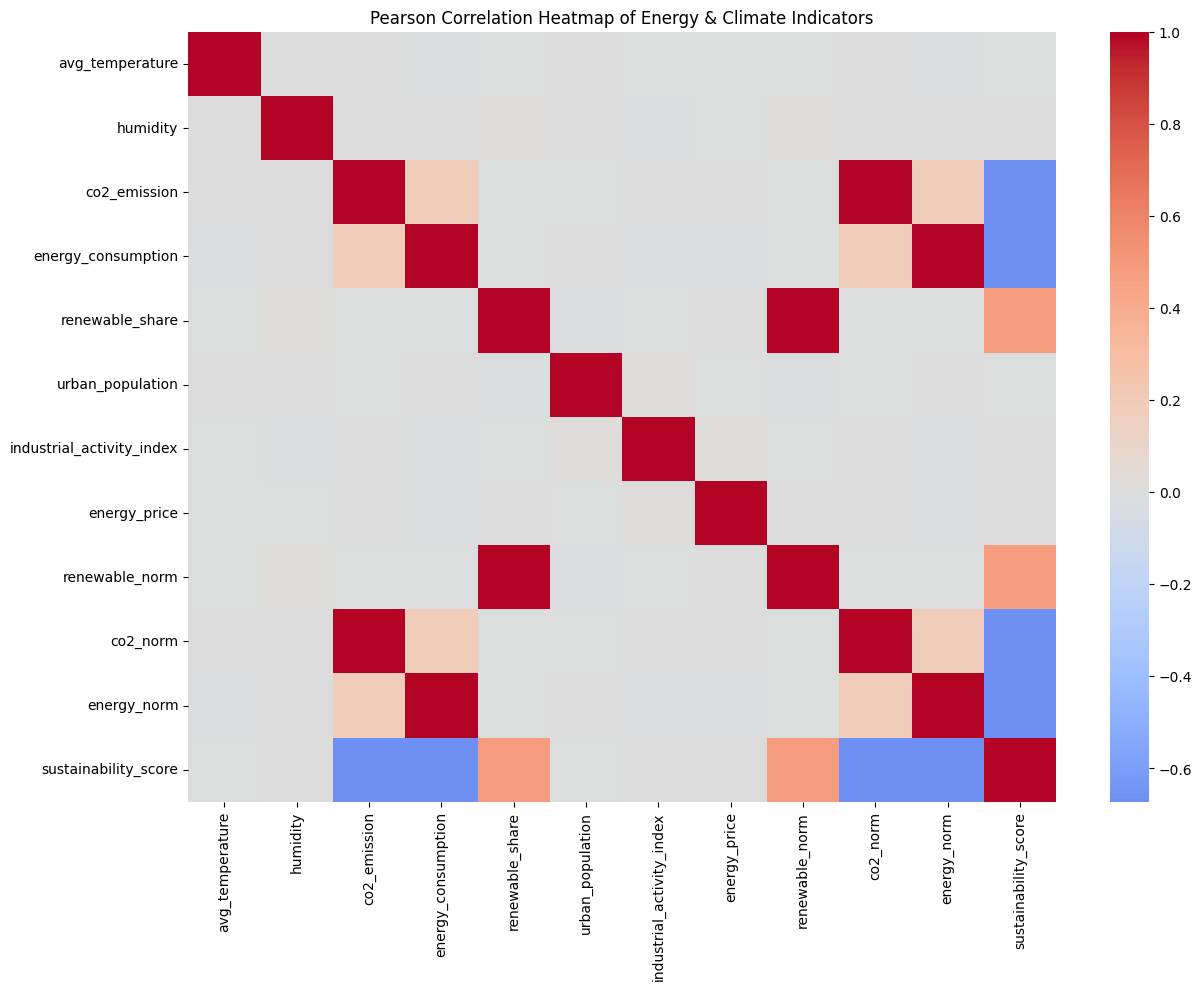

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(
    pearson_corr,
    cmap='coolwarm',
    center=0
)
plt.title("Pearson Correlation Heatmap of Energy & Climate Indicators")
plt.show()


In [108]:
df['Temp_Sustainability'] = pd.qcut(
    df['co2_emission'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

group_variance = df.groupby('Temp_Sustainability')[numeric_df.columns].var()
group_variance


,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price,renewable_norm,co2_norm,energy_norm,sustainability_score
Temp_Sustainability,,,,,,,,,,,,
Low,86.423074,304.690689,4602.671392,1.259804e+07,27.898318,75.664529,303.105964,2439.435905,0.041686,0.005103,0.056020,0.105110
Medium,92.634019,296.418465,4594.393192,1.318380e+07,28.855369,73.926752,300.193253,2406.838819,0.043116,0.005094,0.058625,0.109898
High,125.603775,297.119395,13058.471304,1.416186e+07,28.629582,74.646431,298.214440,2409.580978,0.042778,0.014478,0.062974,0.126681


In [109]:
high_corr_pairs = (
    pearson_corr.abs()
    .where(np.triu(np.ones(pearson_corr.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

high_corr_pairs[high_corr_pairs > 0.85]


,,0
energy_consumption,energy_norm,1.0
renewable_share,renewable_norm,1.0
co2_emission,co2_norm,1.0


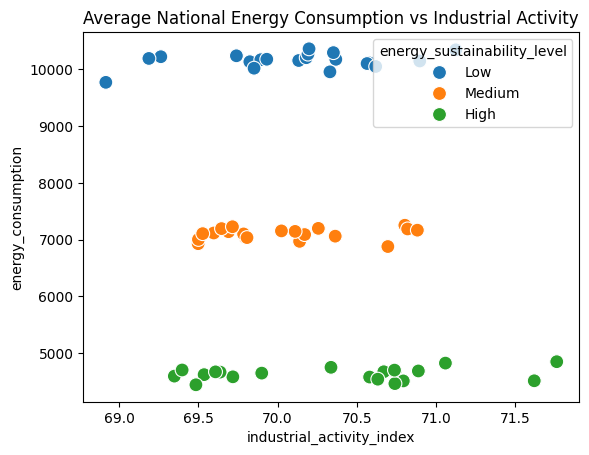

In [83]:
country_agg = df.groupby(['country', 'energy_sustainability_level']).agg({
    'industrial_activity_index': 'mean',
    'energy_consumption': 'mean'
}).reset_index()

sns.scatterplot(
    data=country_agg,
    x='industrial_activity_index',
    y='energy_consumption',
    hue='energy_sustainability_level',
    s=100
)

plt.title("Average National Energy Consumption vs Industrial Activity")
plt.show()


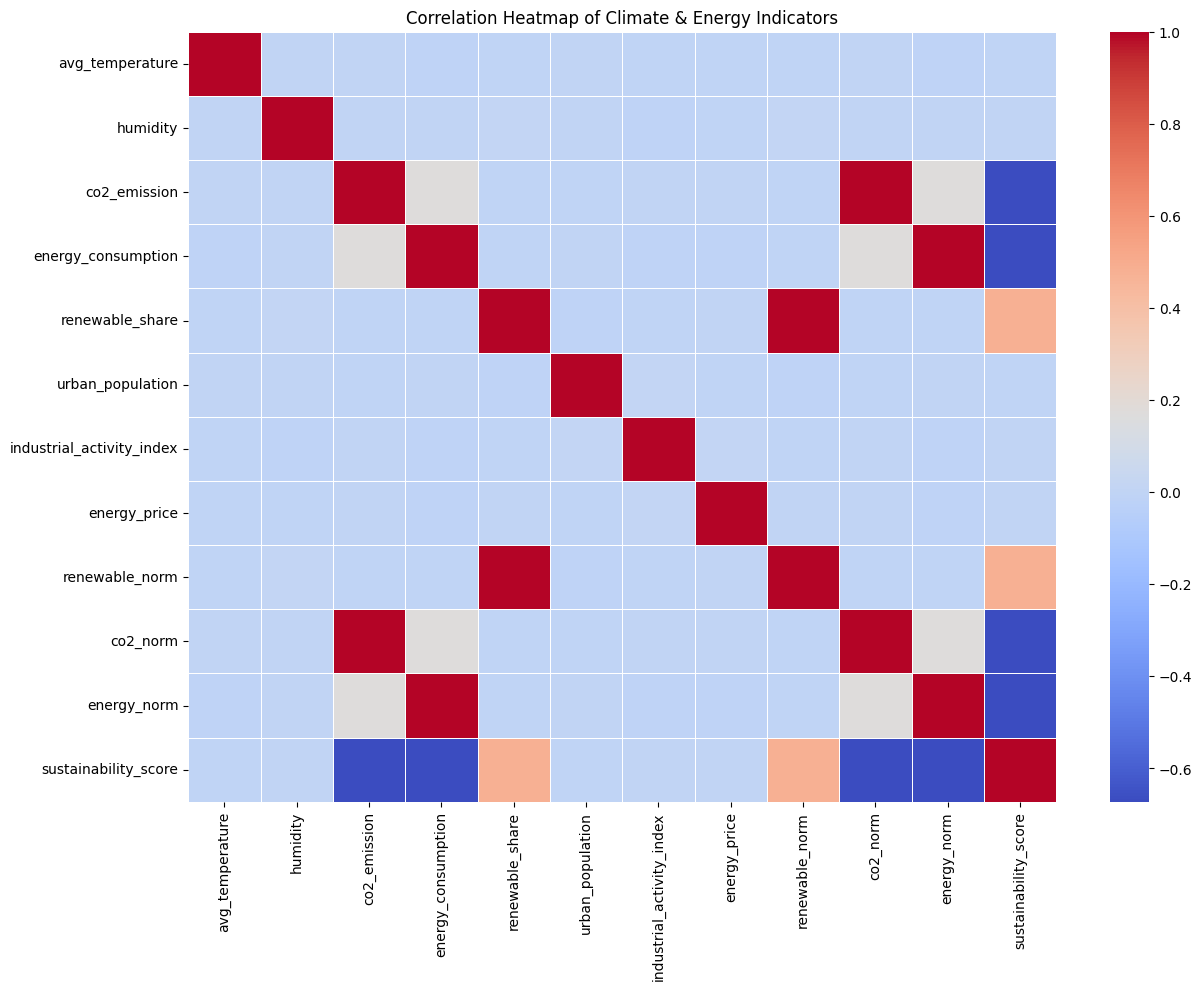

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
sns.heatmap(
    numeric_df.corr(),
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Climate & Energy Indicators")
plt.show()
